In [77]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import patsy as pt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn import preprocessing
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_moons, make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'sklearn.datasets.samples_generator'

## 5

We have seen that we can fit an SVM with a non-linear kernel in order
to perform classification using a non-linear decision boundary. We will
now see that we can also obtain a non-linear decision boundary by
performing logistic regression using non-linear transformations of the
features.

(a) Generate a data set with n = 500 and p = 2, such that the obser-
vations belong to two classes with a quadratic decision boundary
between them. For instance, you can do this as follows

In [62]:
np.random.seed(0)
x1 = np.random.uniform(0, 1, 500) - 0.5
x2 = np.random.uniform(0, 1, 500) - 0.5
y = 1*(x1**2 - x2**2 > 0)

(b) Plot the observations, colored according to their class labels.
Your plot should display X1 on the x-axis, and X2 on the y-
axis.

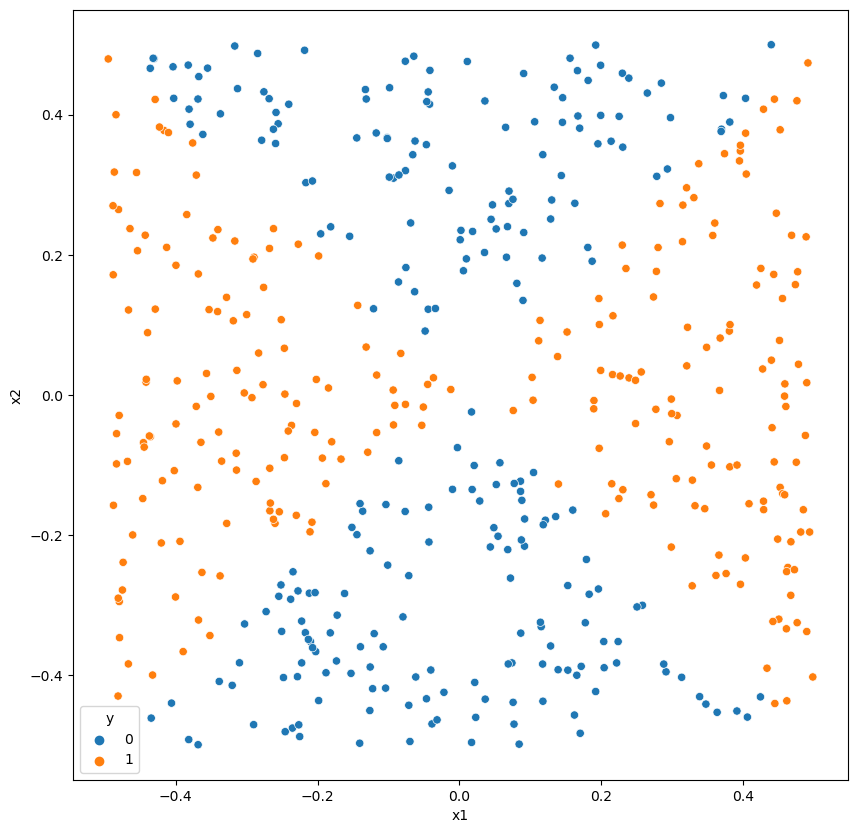

In [63]:
# Plot data
df = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})
plt.figure(figsize=(10, 10))
sns.scatterplot(x='x1', y='x2', hue='y', data=df);

(c) Fit a logistic regression model to the data, using X1 and X2 as
predictors.

In [64]:
glm1     = LogisticRegression()
glm1_fit = glm1.fit(df.iloc[:,0:2], df['y'])

(d) Apply this model to the training data in order to obtain a pre-
dicted class label for each training observation. Plot the ob-
servations, colored according to the predicted class labels. The
decision boundary should be linear.

In [68]:
# Pre-process data with only linear features
f = 'y ~ x1 + x2'
y, X = pt.dmatrices(f, df)
y = np.ravel(y)

train = np.random.random(len(y)) > 0.5

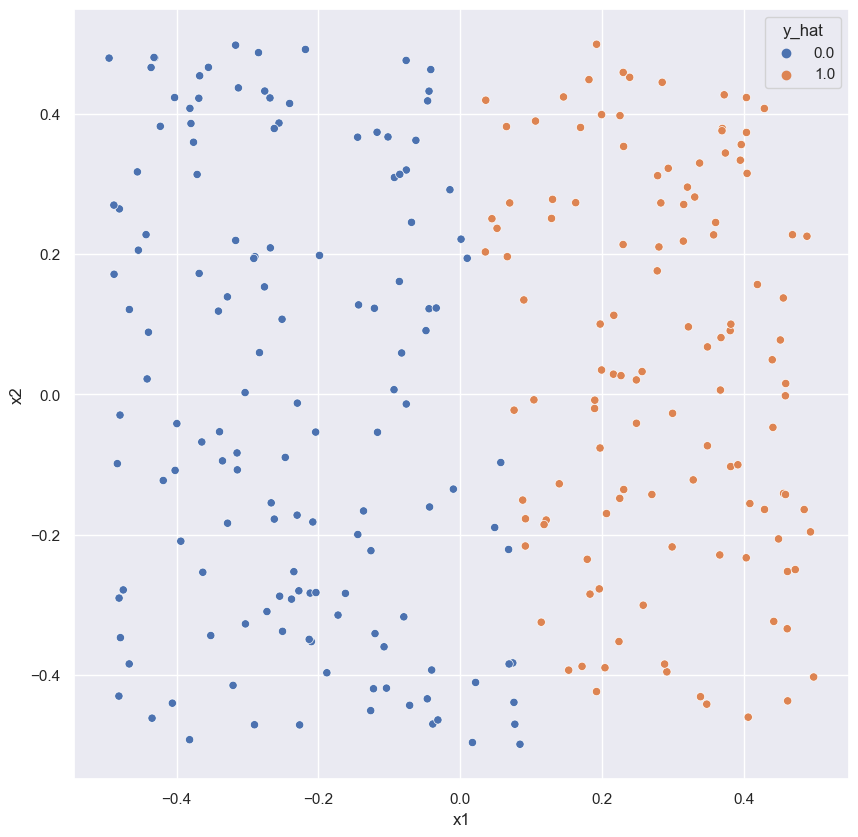

Training accuracy: 0.5984555984555985
Test accuracy    : 0.5228215767634855


In [70]:
# Fit model on training set
model = LogisticRegression().fit(X[train], y[train])
# Predict
y_hat = model.predict(X[train])

# Plot data
plot_df = pd.DataFrame({'x1':X[train][:,1], 'x2':X[train][:,2], 'y_hat':y_hat})
plt.figure(figsize=(10, 10))
sns.scatterplot(x='x1', y='x2', hue='y_hat', data=plot_df)
plt.show();

print(f'Training accuracy: {model.score(X[train], y[train])}')
print(f'Test accuracy    : {model.score(X[~train], y[~train])}')

 (e)  Now fit a logistic regression model to the data using non-linear
functions of X1 and X2 as predictors (e.g. X2
1 , X1 ×X2, log(X2),
and so forth).

In [71]:
df['x12'] = df['x1']**2
df['x22'] = df['x2']**2
glm2      = LogisticRegression()
glm2_fit  = glm2.fit(df.drop('y', axis=1), df['y'])

(f) Apply this model to the training data in order to obtain a pre-
dicted class label for each training observation. Plot the ob-
servations, colored according to the predicted class labels. The
decision boundary should be obviously non-linear. If it is not,
then repeat (a)–(e) until you come up with an example in which
the predicted class labels are obviously non-linear

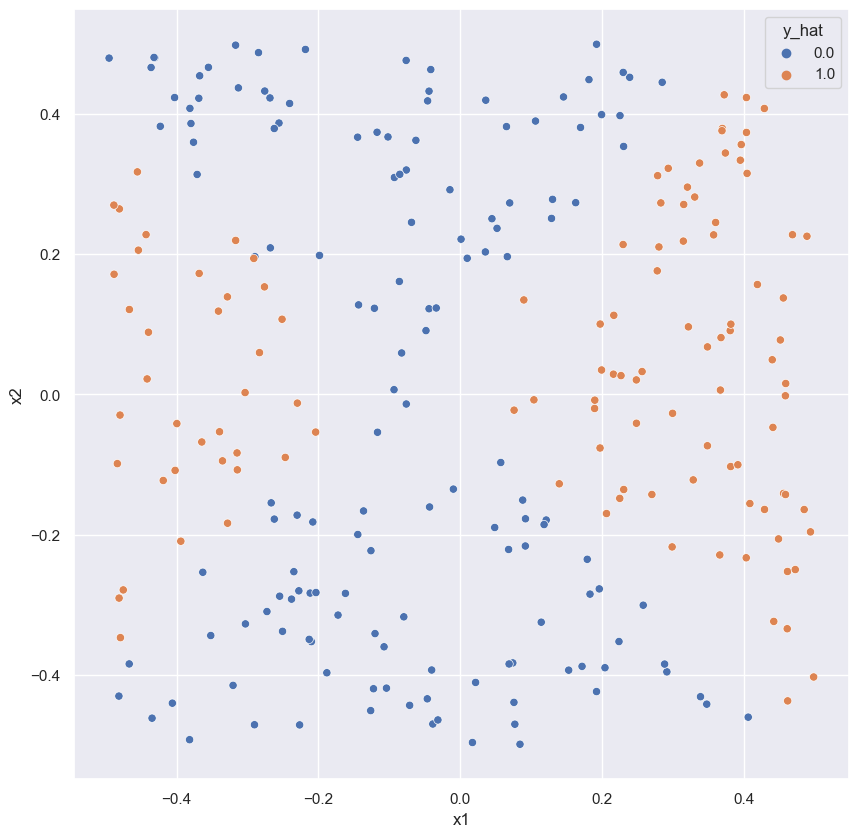

Training accuracy: 0.8957528957528957
Test accuracy    : 0.8506224066390041


In [73]:
# Pre-process data with quadratic features
f = 'y ~ x1 + x2 + np.power(x1, 2) + np.power(x2, 2)'
y, X = pt.dmatrices(f, df)
y = np.ravel(y)

# Fit model on training set
model = LogisticRegression().fit(X[train], y[train])
# Predict
y_hat = model.predict(X[train])

# Plot data
plot_df = pd.DataFrame({'x1':X[train][:,1], 'x2':X[train][:,2], 'y_hat':y_hat})
plt.figure(figsize=(10, 10))
sns.scatterplot(x='x1', y='x2', hue='y_hat', data=plot_df)
plt.show();

print(f'Training accuracy: {model.score(X[train], y[train])}')
print(f'Test accuracy    : {model.score(X[~train], y[~train])}')

(g) Fit a support vector classifier to the data with X1 and X2 as
predictors. Obtain a class prediction for each training observa-
tion. Plot the observations, colored according to the predicted
class labels.

In [85]:
def plot_clf(model, df, grid_range, show_contours=False, show_support_vectors=False):
    # Decision boundary plot
    
    # Get grid of values in given range
    x1 = grid_range
    x2 = grid_range
    xx1, xx2 = np.meshgrid(x1, x2, sparse=False)
    Xgrid = np.stack((xx1.flatten(), xx2.flatten())).T
    
    # Get decision boundary values for plot grid
    decision_boundary      = model.predict(Xgrid)
    decision_boundary_grid = decision_boundary.reshape(len(x2), len(x1))
    
    # Get decision function values for plot grid
    decision_function      = model.decision_function(Xgrid)
    decision_function_grid = decision_function.reshape(len(x2), len(x1))
    
    fig = plt.figure(figsize=(10, 10))
    if show_contours:
        plt.contourf(x1, x2, decision_function_grid);
    plt.contour(x1, x2, decision_boundary_grid);
    
    sns.scatterplot(x='x1', y='x2', hue='y', data=df)
    if show_support_vectors:
        sns.scatterplot(x=model.support_vectors_[:,0], y=model.support_vectors_[:,1], color='red', marker='+', s=500)
    plt.show();



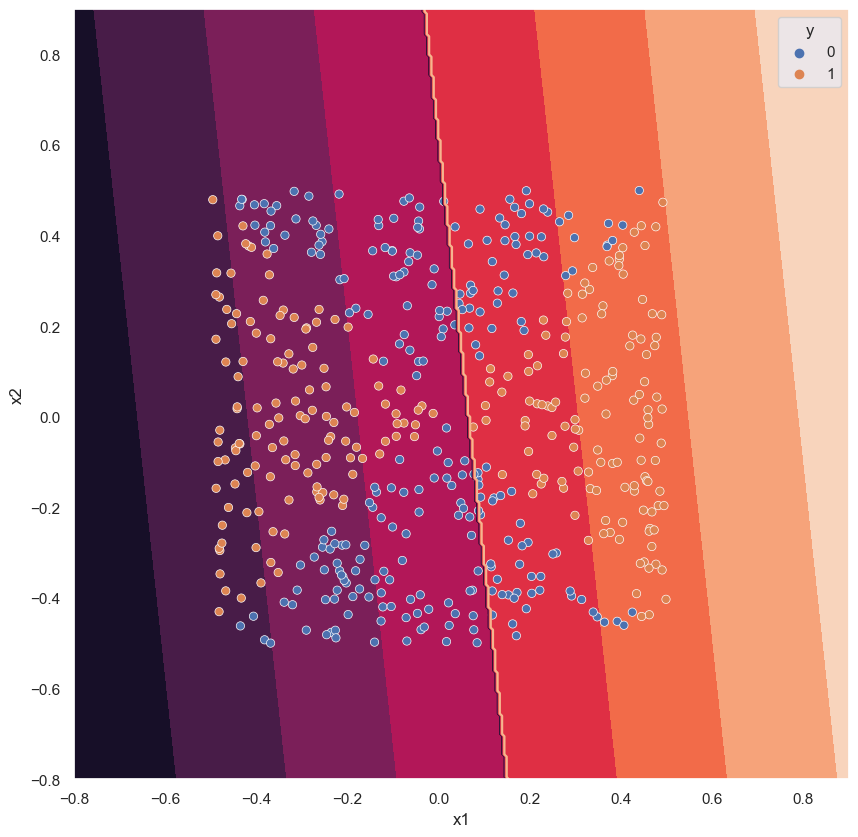

Training accuracy: 0.6023166023166023
Test accuracy    : 0.5186721991701245


In [86]:
f = 'y ~ x1 + x2 - 1'
y, X = pt.dmatrices(f, df)
y = np.ravel(y)

model = svm.SVC(kernel='linear', gamma=1, C=1, random_state=0, probability=True).fit(X[train], y[train])

plot_clf(model, df, np.arange(-.8, .9, .005), show_contours=True)

print(f'Training accuracy: {model.score(X[train], y[train])}')
print(f'Test accuracy    : {model.score(X[~train], y[~train])}')

(h) Fit a SVM using a non-linear kernel to the data. Obtain a class
prediction for each training observation. Plot the observations,
colored according to the predicted class labels.

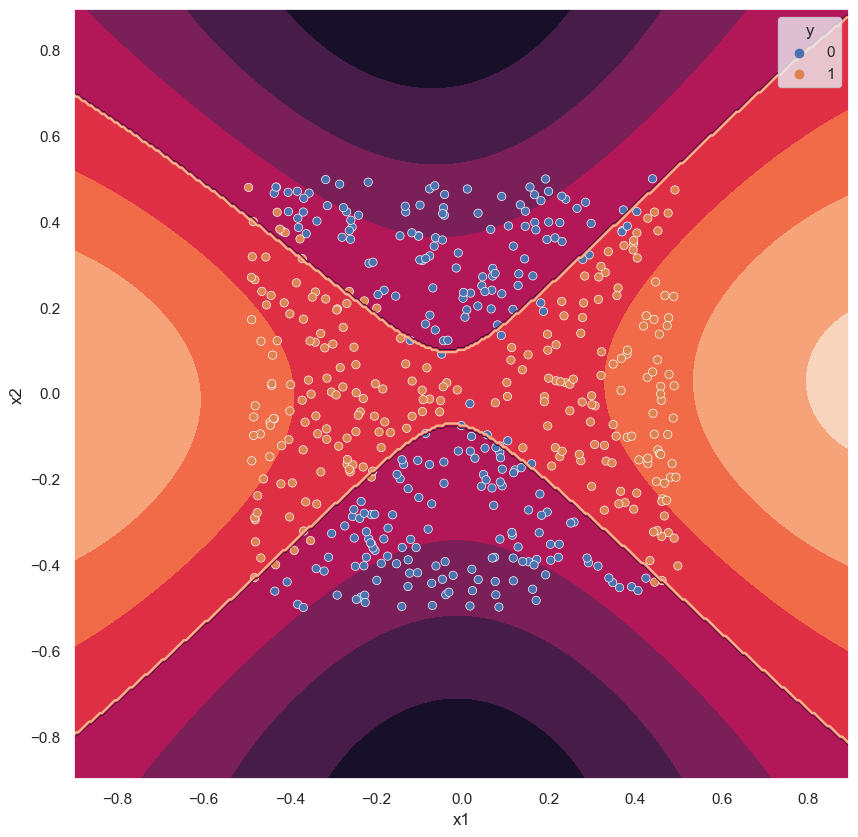

Training accuracy: 0.9420849420849421
Test accuracy    : 0.9336099585062241


In [87]:
f = 'y ~ x1 + x2 - 1'
y, X = pt.dmatrices(f, df)
y = np.ravel(y)

model = svm.SVC(kernel='rbf', gamma=1, C=1, random_state=0, probability=True).fit(X[train], y[train])

plot_clf(model, df, np.arange(-.9, .9, .005), show_contours=True)

print(f'Training accuracy: {model.score(X[train], y[train])}')
print(f'Test accuracy    : {model.score(X[~train], y[~train])}')

(i) Comment on your results.

- The Polynomial Logistic Regression and SVM with a radial Kernal achieved similar fits to the data. The SVM performs better on the test set with an 93% accuracy compared to the 85% from the Logistic model
- The Linear support vector classifier achieves poor results because of the seperation between classes is far from linear.

## 7

In this problem, you will use support vector approaches in order to
predict whether a given car gets high or low gas mileage based on the
Auto data set.

(a) Create a binary variable that takes on a 1 for cars with gas
mileage above the median, and a 0 for cars with gas mileage
below the median

In [89]:
auto_df = pd.read_csv('Auto.csv')

# Remove observations with missing values
auto_df = auto_df.drop(auto_df[auto_df.values == '?'].index)
#auto_df = auto_df.reset_index()

# convet quantitive values to floats
#quants = ['cylinders', 'horsepower', 'weight', 'year']
quants = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']
auto_df[quants] = auto_df[quants].astype(np.float64)

auto_df['mpg_above_median'] = (auto_df['mpg'] > auto_df['mpg'].median()) *1.
auto_df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg_above_median
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu,0.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320,0.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite,0.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst,0.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino,0.0


(b) Fit a support vector classifier to the data with various values of
C, in order to predict whether a car gets high or low gas mileage.
Report the cross-validation errors associated with different val-
ues of this parameter. Comment on your results. Note you will
need to fit the classifier without the gas mileage variable to pro-
duce sensible results.

In [90]:
f = 'mpg_above_median ~ cylinders + displacement + horsepower + weight + acceleration + year + C(origin)'
y, X = pt.dmatrices(f, auto_df)

# Scale data
X = preprocessing.scale(X)
y = np.ravel(y)

In [91]:
costs = np.logspace(-5, 2, 20)
scores = []
for i in costs:
    # Get cv score 
    model = svm.SVC(kernel='linear', C=i, random_state=0)
    score = np.mean(cross_val_score(model, preprocessing.scale(X), y, cv=5))
    scores += [[i, score]]
    #print(f'progress: {list(costs).index(i)} of {len(costs)}')

columns=['Cost', 'CV_accuracy']
results_df = pd.DataFrame(data=np.asarray(scores), columns=columns)

display(results_df)

,Cost,CV_accuracy
0,0.000010,0.630802
1,0.000023,0.630802
2,0.000055,0.630802
3,0.000127,0.630802
4,0.000298,0.681435
5,0.000695,0.818306
6,0.001624,0.877215
7,0.003793,0.882376
8,0.008859,0.902889
9,0.020691,0.895326


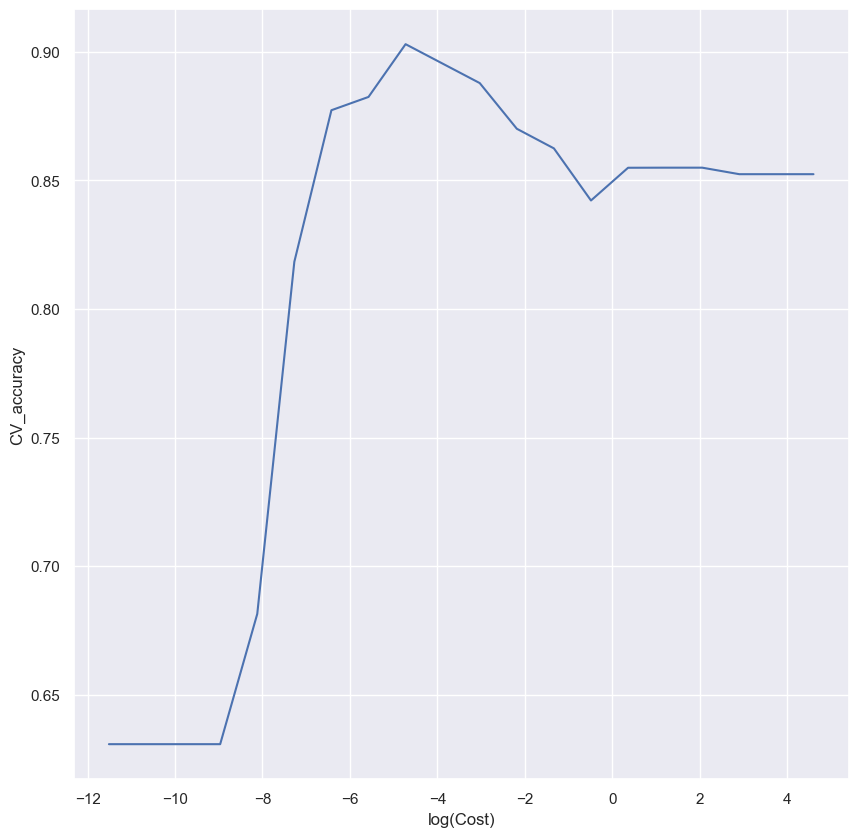

In [92]:
results_df['log(Cost)'] = np.log(results_df['Cost'])
plt.figure(figsize=(10,10))
sns.lineplot(x='log(Cost)', y='CV_accuracy', data=results_df);

(c) Now repeat (b), this time using SVMs with radial and polyno-
mial basis kernels, with different values of gamma and degree and
C. Comment on your results

In [101]:
C_range     = np.logspace(-5, 3, 10)
gamma_range = np.logspace(-5, 3, 10)
kernels     = ['rbf', 'poly']
degrees     = [3, 5, 7, 9]     # Using only odd values, because I noticed earlier evens are slow!
param_grid  = dict(gamma=gamma_range, C=C_range, kernel=kernels, degree=degrees)
rbf_grid = GridSearchCV(svm.SVC(cache_size=2000), param_grid=param_grid, cv=5, 
                        scoring='accuracy', return_train_score=True)
rbf_grid.fit(X, y)

GridSearchCV(cv=5, estimator=SVC(cache_size=2000),
             param_grid={'C': array([1.00000000e-05, 7.74263683e-05, 5.99484250e-04, 4.64158883e-03,
       3.59381366e-02, 2.78255940e-01, 2.15443469e+00, 1.66810054e+01,
       1.29154967e+02, 1.00000000e+03]),
                         'degree': [3, 5, 7, 9],
                         'gamma': array([1.00000000e-05, 7.74263683e-05, 5.99484250e-04, 4.64158883e-03,
       3.59381366e-02, 2.78255940e-01, 2.15443469e+00, 1.66810054e+01,
       1.29154967e+02, 1.00000000e+03]),
                         'kernel': ['rbf', 'poly']},
             return_train_score=True, scoring='accuracy')

In [103]:

param_grid = {
    'gamma': np.array([1.00000e-05, 7.74264e-05, 5.99484e-04, 4.64159e-03, 3.59381e-02,
                       2.78256e-01, 2.15443e+00, 1.66810e+01, 1.29155e+02, 1.00000e+03]),
    'C': np.array([1.00000e-05, 7.74264e-05, 5.99484e-04, 4.64159e-03, 3.59381e-02,
                    2.78256e-01, 2.15443e+00, 1.66810e+01, 1.29155e+02, 1.00000e+03]),
    'kernel': ['rbf', 'poly'],
    'degree': [3, 5, 7, 9],
}

grid_search = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    refit=True
)

grid_search.fit(X, y)  


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([1.00000e-05, 7.74264e-05, 5.99484e-04, 4.64159e-03, 3.59381e-02,
       2.78256e-01, 2.15443e+00, 1.66810e+01, 1.29155e+02, 1.00000e+03]),
                         'degree': [3, 5, 7, 9],
                         'gamma': array([1.00000e-05, 7.74264e-05, 5.99484e-04, 4.64159e-03, 3.59381e-02,
       2.78256e-01, 2.15443e+00, 1.66810e+01, 1.29155e+02, 1.00000e+03]),
                         'kernel': ['rbf', 'poly']},
             scoring='accuracy')

In [100]:
pd.DataFrame(rbf_grid.cv_results_).sort_values('rank_test_score', ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_gamma,param_kernel,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
526,0.005777,0.004789,0.002082,0.003182,2.154435,7,0.004642,rbf,"{'C': 2.154434690031882, 'degree': 7, 'gamma':...",0.936709,...,0.902921,0.027958,1,0.916933,0.907348,0.923567,0.910828,0.917197,0.915175,0.005617
486,0.004080,0.003325,0.000902,0.001105,2.154435,3,0.004642,rbf,"{'C': 2.154434690031882, 'degree': 3, 'gamma':...",0.936709,...,0.902921,0.027958,1,0.916933,0.907348,0.923567,0.910828,0.917197,0.915175,0.005617
546,0.004149,0.004314,0.002051,0.003127,2.154435,9,0.004642,rbf,"{'C': 2.154434690031882, 'degree': 9, 'gamma':...",0.936709,...,0.902921,0.027958,1,0.916933,0.907348,0.923567,0.910828,0.917197,0.915175,0.005617
506,0.006072,0.004252,0.002603,0.004055,2.154435,5,0.004642,rbf,"{'C': 2.154434690031882, 'degree': 5, 'gamma':...",0.936709,...,0.902921,0.027958,1,0.916933,0.907348,0.923567,0.910828,0.917197,0.915175,0.005617
390,0.005715,0.003920,0.004548,0.003925,0.035938,9,0.278256,rbf,"{'C': 0.03593813663804626, 'degree': 9, 'gamma...",0.949367,...,0.900325,0.033167,5,0.900958,0.907348,0.917197,0.910828,0.914013,0.910069,0.005610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,0.014376,0.003350,0.006152,0.003335,0.000077,7,1000.0,rbf,"{'C': 7.742636826811278e-05, 'degree': 7, 'gam...",0.493671,...,0.497468,0.003101,777,0.501597,0.501597,1.000000,1.000000,1.000000,0.800639,0.244166
78,0.011937,0.003234,0.006178,0.004286,0.00001,9,1000.0,rbf,"{'C': 1e-05, 'degree': 9, 'gamma': 1000.0, 'ke...",0.493671,...,0.497468,0.003101,777,0.501597,0.501597,1.000000,1.000000,1.000000,0.800639,0.244166
278,0.014917,0.003933,0.008334,0.003135,0.004642,5,1000.0,rbf,"{'C': 0.004641588833612777, 'degree': 5, 'gamm...",0.493671,...,0.497468,0.003101,777,0.501597,0.501597,1.000000,1.000000,1.000000,0.800639,0.244166
158,0.013241,0.003397,0.006622,0.003316,0.000077,9,1000.0,rbf,"{'C': 7.742636826811278e-05, 'degree': 9, 'gam...",0.493671,...,0.497468,0.003101,777,0.501597,0.501597,1.000000,1.000000,1.000000,0.800639,0.244166


- The table above lists the models tested by grid search and ranked by cross validation
- A radial kernal performed best, with a mean CV accuracy of 0.903 which is the same as that achieved by the linear kernal

## 8

This problem involves the OJ data set which is part of the ISLP
package.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

%matplotlib inline

In [117]:
OJ = pd.read_csv('https://raw.githubusercontent.com/makbigc/ISLR/master/datasets/OJ.csv').drop('Unnamed: 0', axis=1)
OJ.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


(a) Create a training set containing a random sample of 800
observations, and a test set containing the remaining
observations

In [122]:
OJ['Purchase'] = pd.factorize(OJ.Purchase)[0]
OJ['Store7']   = OJ.Store7.map({'No':0, 'Yes':1})

In [123]:
x = OJ.drop(['Purchase'], axis=1)
y = OJ['Purchase']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=800, random_state=1)

In [125]:
x_no_scale    = ['StoreID', 'SpecialCH', 'SpecialMM', 'Store7', 'STORE']
x_to_scale    = xtrain[xtrain.columns.difference(x_no_scale)]
scaler        = StandardScaler().fit(x_to_scale) 
temp1         = pd.DataFrame(scaler.transform(x_to_scale), columns=xtrain.columns.difference(x_no_scale))
temp2         = xtrain[x_no_scale].reset_index(drop=True)
scaled_xtrain = pd.concat([temp1, temp2], axis=1)

In [126]:
x_to_scale    = xtest[xtest.columns.difference(x_no_scale)]
temp1         = pd.DataFrame(scaler.transform(x_to_scale), columns=xtest.columns.difference(x_no_scale))
temp2         = xtest[x_no_scale].reset_index(drop=True)
scaled_xtest  = pd.concat([temp1, temp2], axis=1)


(b) Fit a support vector classifier to the training data using
C = 0.01, with Purchase as the response and the other variables
as predictors. How many support points are there?

In [127]:
svc = SVC(C=0.01, kernel='linear')
svc.fit(scaled_xtrain, ytrain)

SVC(C=0.01, kernel='linear')

- In our dataset, we have 800 observations, 2 classes and a total of 611 support vectors.
- 307 of the support vectors belong to class CH and 30

(c) What are the training and test error rates?

In [128]:
svc_train_err = 1-svc.score(scaled_xtrain, ytrain)
svc_test_err  = 1-svc.score(scaled_xtest, ytest)
print('SVC training error: %.2f | SVC test error: %.2f' %(svc_train_err, svc_test_err))

SVC training error: 0.17 | SVC test error: 0.16


(d) Use cross-validation to select an optimal C. Consider values in
the range 0.01 to 10.

In [129]:
tune_param = [{'C': [0.01, 0.1, 1, 10]}]

In [130]:
tune_out = GridSearchCV(SVC(kernel='linear'), tune_param, cv=10, scoring='accuracy')
tune_out.fit(scaled_xtrain, ytrain)
best_svc = tune_out.best_estimator_ 

(e) Compute the training and test error rates using this new value
for C.

In [131]:
best_svc_train_err = 1-best_svc.score(scaled_xtrain, ytrain)
best_svc_test_err  = 1-best_svc.score(scaled_xtest, ytest)
print('best SVC training error: %.2f | best SVC test error: %.2f' %(best_svc_train_err, best_svc_test_err))

best SVC training error: 0.16 | best SVC test error: 0.17


(f) Repeat parts (b) through (e) using a support vector machine
with a radial kernel. Use the default value for gamma

In [132]:
svmr = SVC(C=0.01, kernel='rbf', gamma='auto')
svmr.fit(scaled_xtrain, ytrain)

SVC(C=0.01, gamma='auto')

In [133]:
svmr_train_err = 1-svmr.score(scaled_xtrain, ytrain)
svmr_test_err  = 1-svmr.score(scaled_xtest, ytest)
print('SVM radial training error: %.2f | SVM radial test error: %.2f' %(svmr_train_err, svmr_test_err))

SVM radial training error: 0.38 | SVM radial test error: 0.42


In [135]:
tune_out   = GridSearchCV(SVC(kernel='rbf', gamma='auto'), tune_param, cv=10, scoring='accuracy')
tune_out.fit(scaled_xtrain, ytrain)
best_svmr  = tune_out.best_estimator_ 

In [136]:
best_svmr_train_err = 1-best_svmr.score(scaled_xtrain, ytrain)
best_svmr_test_err  = 1-best_svmr.score(scaled_xtest, ytest)
print('training error: %.2f | test error: %.2f' %(best_svmr_train_err, best_svmr_test_err))

training error: 0.16 | test error: 0.19


(g) Repeat parts (b) through (e) using a support vector machine
with a polynomial kernel. Set degree = 2

In [137]:
svmp = SVC(C=0.01, kernel='poly', degree=2)
svmp.fit(scaled_xtrain, ytrain)

SVC(C=0.01, degree=2, kernel='poly')

In [138]:
svmp_train_err = 1-svmp.score(scaled_xtrain, ytrain)
svmp_test_err  = 1-svmp.score(scaled_xtest, ytest)
print('SVM poly training error: %.2f | SVM poly test error: %.2f' %(svmp_train_err, svmp_test_err))

SVM poly training error: 0.38 | SVM poly test error: 0.42


In [139]:
tune_out   = GridSearchCV(SVC(kernel='poly', degree=2), tune_param, cv=10, scoring='accuracy')
tune_out.fit(scaled_xtrain, ytrain)
best_svmp  = tune_out.best_estimator_ 

In [140]:
best_svmp_train_err = 1-best_svmp.score(scaled_xtrain, ytrain)
best_svmp_test_err  = 1-best_svmp.score(scaled_xtest, ytest)
print('training error: %.2f | test error: %.2f' %(best_svmp_train_err, best_svmp_test_err))

training error: 0.16 | test error: 0.21


(h) Overall, which approach seems to give the best results on this
data?

Text(0, 0.5, 'test error')

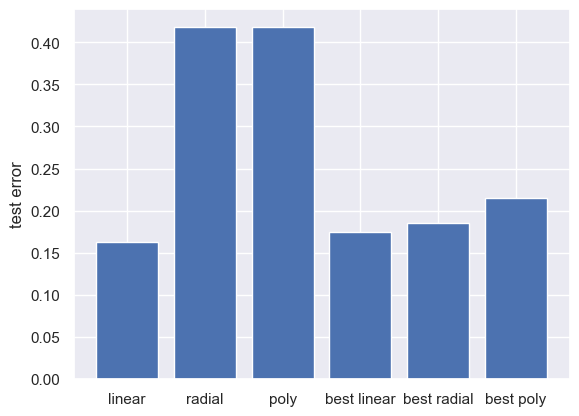

In [141]:
x_label = np.arange(6)
plt.bar(x_label, [svc_test_err, svmr_test_err, svmp_test_err, best_svc_test_err, best_svmr_test_err, best_svmp_test_err])
plt.xticks(x_label, ('linear', 'radial', 'poly', 'best linear', 'best radial', 'best poly'))
plt.ylabel('test error')

- Overall SVC Radial and Poly performed the best